In [34]:
import os
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [2]:
labels = ['business', 'entertainment', 'politics', 'README.TXT', 'sport', 'tech']
# files = os.listdir(".\BBC\\business")

In [3]:
files = os.listdir(".\BBC\\business")

In [4]:
# Reading the data from individual folders and saving it in a list
# Extracting the Title, Headline and the body
def prepare_data(folder):
    titles = []
    summary = []
    body = []
    loc = os.listdir(f".\BBC\\{folder}")
    for x in loc:
        with open(f".\BBC\\{folder}\\{x}") as f:
            file = f.read()
            file = file.split("\n")
            file = list(filter(None, file))
            titles.append(file[0])
            summary.append(file[1])
            body.append("".join(file[2:]))
            
    return titles, summary, body



In [5]:
# Calling the function to extract the data from the txt file and combine them
business_t, business_s, business_b = prepare_data("business")
entertainment_t, entertainment_s, entertainment_b = prepare_data("entertainment")
politics_t, politics_s, politics_b = prepare_data("politics")
sport_t, sport_s, sport_b = prepare_data("sport")
tech_t, tech_s, tech_b = prepare_data("tech")



In [6]:
business_l = ['business'] * len(business_b)
entertainment_l = ['entertainment'] * len(entertainment_t)
politics_l = ['politics'] * len(politics_t)
sport_l = ['sport'] * len(sport_t)
tech_l = ['tech'] * len(tech_t)

In [10]:
# business_t

In [16]:
# Creating Dataframe
business = pd.DataFrame(zip(business_t, business_s, business_b, business_l),columns=['Title','Headline','Body','Label'])
entertainment = pd.DataFrame(zip(entertainment_t, entertainment_s, entertainment_b, entertainment_l),columns=['Title','Headline','Body','Label'])
politics = pd.DataFrame(zip(politics_t, politics_s, politics_b, politics_l),columns=['Title','Headline','Body','Label'])
sport = pd.DataFrame(zip(sport_t, sport_s, sport_b, sport_l),columns=['Title','Headline','Body','Label'])
tech = pd.DataFrame(zip(tech_t, tech_s, tech_b, tech_l),columns=['Title','Headline','Body','Label'])



In [49]:
# Creating a dataframe
data= pd.concat([business, entertainment, politics, sport, tech])
# Shuffling the data
data = shuffle(data)

In [59]:
# Saving the data so we can use it without preparing it agian and again
# data.to_csv('Final_data.csv')

In [58]:

data.head()

,Title,Headline,Body,Label
0,Farrell due to make US TV debut,Actor Colin Farrell is to make his debut on US...,"The film star, who recently played the title r...",entertainment
1,Souness eyes summer move for Owen,Newcastle boss Graeme Souness is lining up a s...,He sees Owen as the ideal replacement for Alan...,sport
2,Set your television to wow,Television started off as a magical blurry ima...,After years of buzz about high-definition TV (...,tech
3,Lib Dems target the student vote,Students can decide the fate of MPs in some se...,The party says the votes of students can win i...,politics
4,Hewitt overcomes wobble in Sydney,Lleyton Hewitt gave himself the perfect prepar...,The defending champion brushed aside the Czech...,sport


C:\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Label', ylabel='count'>

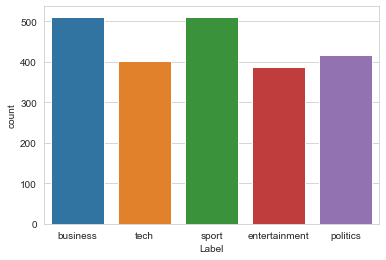

In [46]:
# Counting the number of instance for each class
sns.countplot(data['Label'])